# Stock Price Simulation

In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

  Using cached tensorflow-2.19.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
Using cached tensorflow-2.19.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (645.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install yfinance

  Using cached yfinance-0.2.65-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached peewee-3.18.2-cp312-cp312-linux_x86_64.whl
  Using cached curl_cffi-0.12.0-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (14 kB)
  Using cached websockets-15.0.1-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.8 kB)
Using cached yfinance-0.2.65-py2.py3-none-any.whl (119 kB)
Using cached curl_cffi-0.12.0-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
Using cached websockets-15.0.1-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (182 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install xgboost

  Using cached xgboost-3.0.2-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
  Using cached nvidia_nccl_cu12-2.27.6-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.0 kB)
Using cached xgboost-3.0.2-py3-none-manylinux_2_28_x86_64.whl (253.9 MB)
Using cached nvidia_nccl_cu12-2.27.6-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (322.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install ta

  Using cached ta-0.11.0-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [7]:
import yfinance as yf
import numpy as np
import xgboost
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import svm
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

2025-07-20 11:32:20.575860: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-20 11:32:20.579893: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-20 11:32:20.591840: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753011140.612524     123 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753011140.618636     123 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753011140.634408     123 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

/tmp/ipykernel_123/3903885938.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker_symbol, period="4y")
[*********************100%***********************]  1 of 1 completed


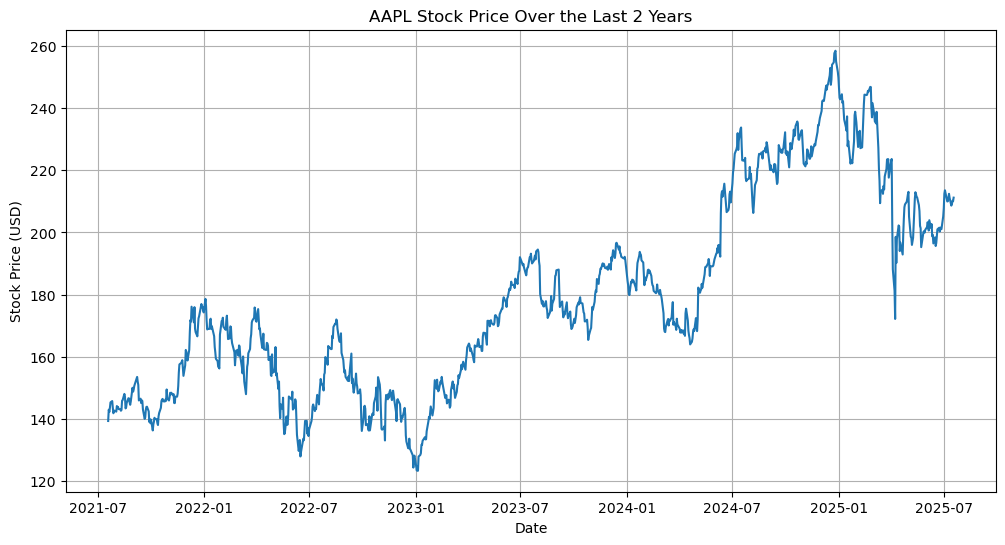

In [8]:
#Calling data from y_finance
ticker_symbol = "AAPL"
data = yf.download(ticker_symbol, period="4y")
closing_data = data['Close']
volume_data = data['Volume']

#plotting function
plt.figure(figsize=(12, 6))
plt.plot(closing_data)
plt.title(f'{ticker_symbol} Stock Price Over the Last 2 Years')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.grid(True)
plt.show()

## Exploratory Analysis
Exploratory data analysis involves examining the raw data to identify any patterns, characteristics or relationships that occur. This can be represented graphically or using tests to determine how the data behaves. The following methods will be used to examine the data :

 - moving averages
 - returns
 - autocorrelation and partial autocorrelation
 - ADF test
 - visualising volatility and correlations



### Moving Averages
Moving averages are used to filter out noise and volatility from stock price data by taking averages from a window across the entire dataset.

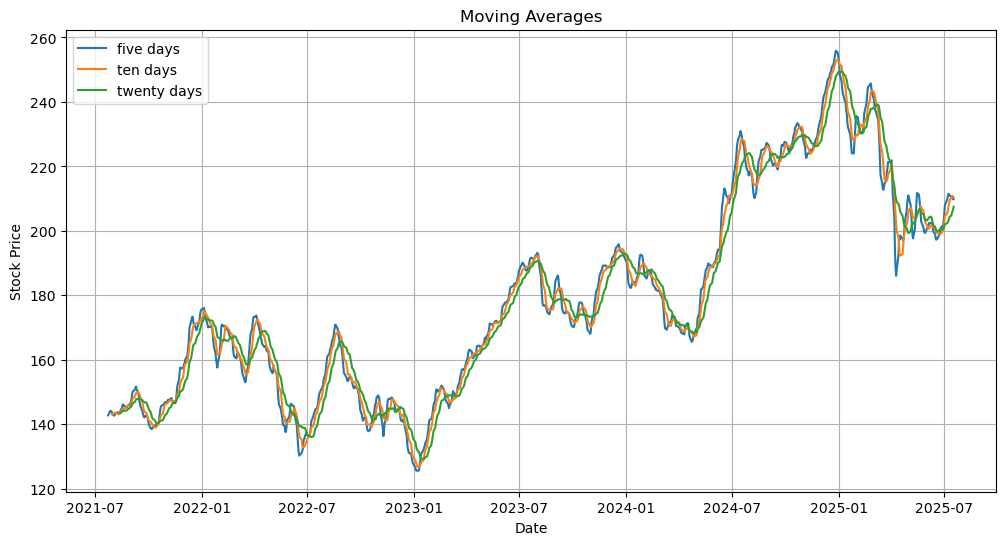

In [9]:
#calculating moving averages
five_avg = closing_data.rolling(window=5).mean() 
ten_avg = closing_data.rolling(window=10).mean()
twenty_avg = closing_data.rolling(window=20).mean()

#plotting function
plt.figure(figsize=(12,6))
plt.plot(five_avg,label="five days")
plt.plot(ten_avg,label="ten days")
plt.plot(twenty_avg,label="twenty days")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Moving Averages")
plt.grid(True)
plt.legend()
plt.show()

### Simple and Continuous (Log) Returns

#### Simple Returns
Simple returns refer to the percentage change of the stock price from the day before.

#### Continuous returns
Continuous returns are also known as log returns. This represents the theoretical limit of returns continuously compounding infinitely often.

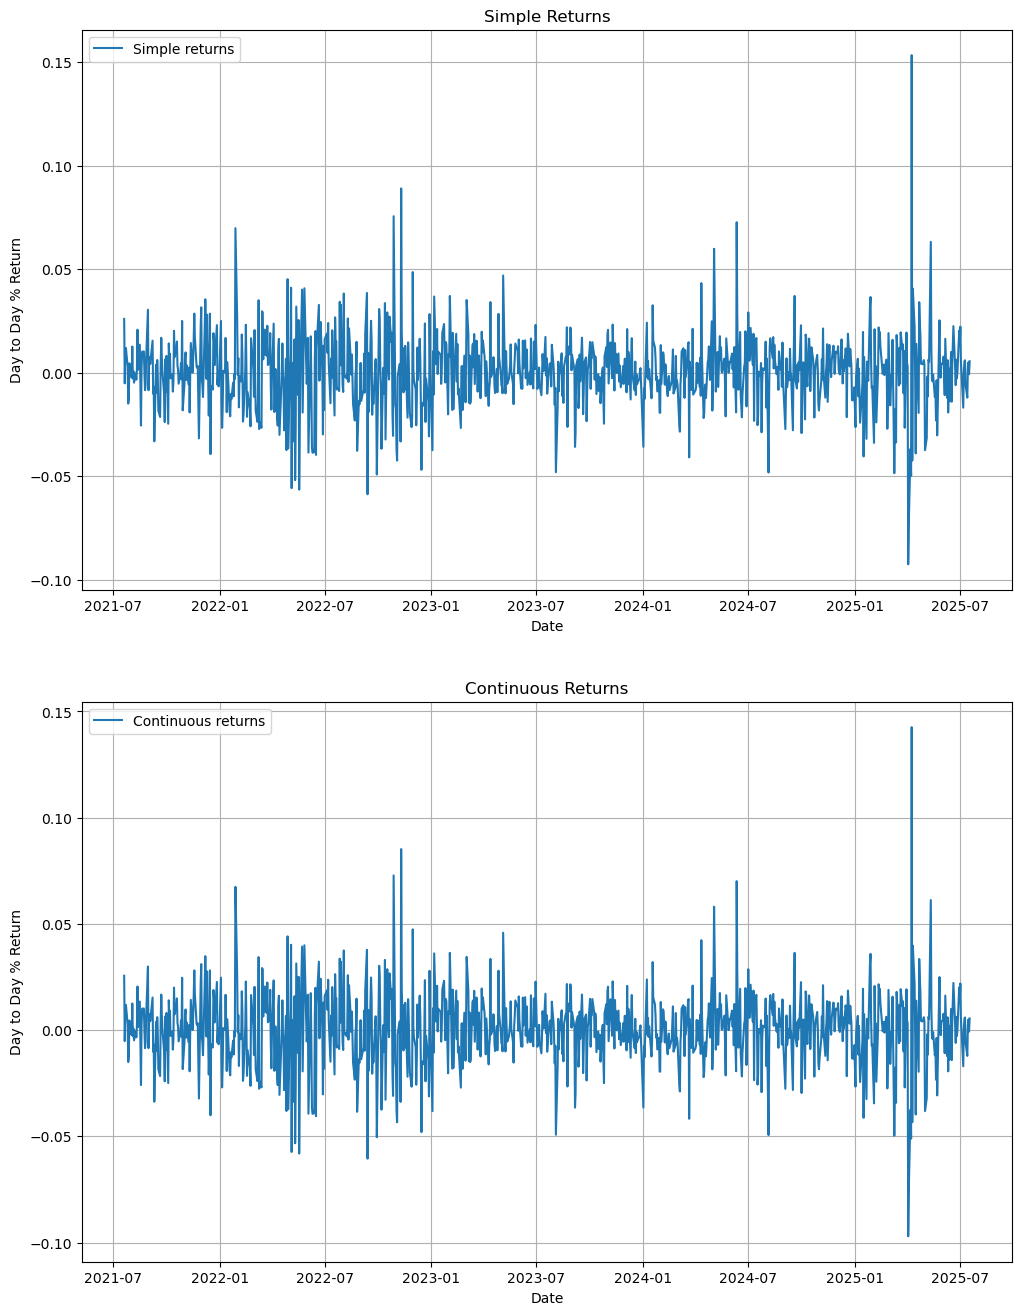

In [10]:
#calculating simple and log return values
simple_return_data = closing_data.pct_change()
log_return_data = np.log(closing_data / closing_data.shift(1))
log_return_data = log_return_data.dropna() 

#plotting simple return data
plt.figure(figsize=(12,16))
plt.subplot(2,1,1)
plt.grid(True)
plt.plot(simple_return_data,label="Simple returns")
plt.title("Simple Returns")
plt.xlabel("Date")
plt.ylabel("Day to Day % Return")
plt.legend()

#plotting continous return data
plt.subplot(2,1,2)
plt.grid(True)
plt.plot(log_return_data,label="Continuous returns")
plt.title("Continuous Returns")
plt.xlabel("Date")
plt.ylabel("Day to Day % Return")
plt.legend()
plt.show()

### Autocorrelation and Partial Autocorrelation
By definition, autocorrelation is a mathematical representation for the degree of similarity for a time series against a lagged version of itself. What autocorrelation tells us is if the data in the future will be similar to previous data points depending on the autocorrelation value. For example, a strong positive autocorrelation coefficient for the closing price of a stock tells us that there is a high likelihood that if the stock price has increased today, it will also increase tomorrow.  

Autocorrelation from the present to lagged points in time includes the effects of all intermediate points in time. This differs from partial autocorrelation that only measures the direct influence of the lagged time frame against the present time frame.

<Figure size 1200x600 with 0 Axes>

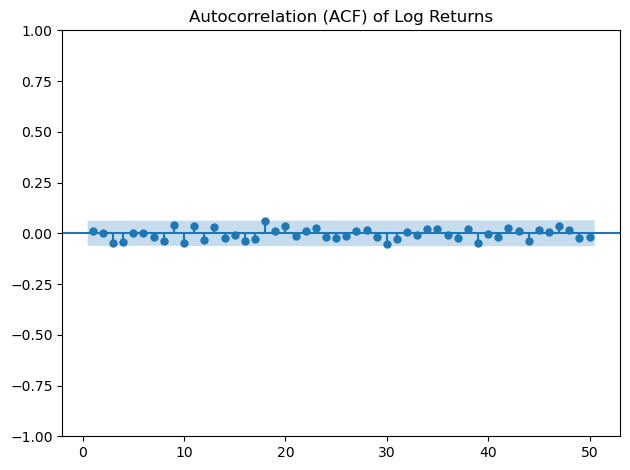

In [11]:
# plotting the graph
plt.figure(figsize=(12,6))
plot_acf(log_return_data, lags=50, zero=False) #calculating autocorrelation
plt.title("Autocorrelation (ACF) of Log Returns")
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

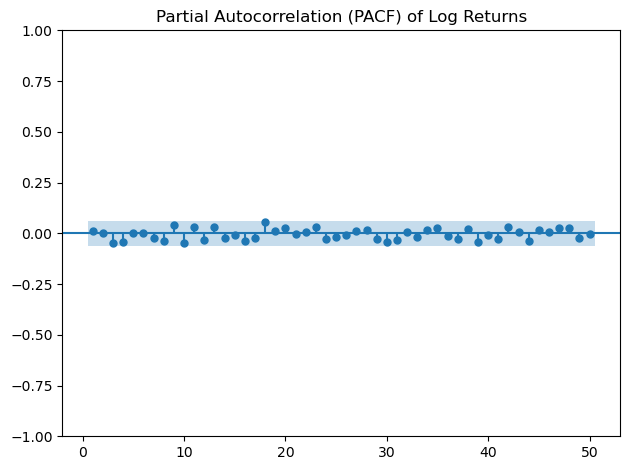

In [12]:
plt.figure(figsize=(12,6))
plot_pacf(log_return_data, lags=50, zero=False, method='ywm')
plt.title("Partial Autocorrelation (PACF) of Log Returns")
plt.tight_layout()
plt.show()

Both Autocorrelation and Partial Autocorrelation show that historic stock price data does not influence future stock prices heavily as seen by the 2 graphs.

### ADF Test and Stationary Data
The Augmented Dickey-Fuller Test is used to determine if a dataset is stationary according to their p-value. Stationary data means that 

In [13]:
print(adfuller(log_return_data, maxlag=None, regression = 'c', autolag = 'AIC')[1]) #performing the ADF test, the p-value is returned

0.0


### Visualising volatility
Volatility can be visualised by using rolling standard deviations from the log return data.

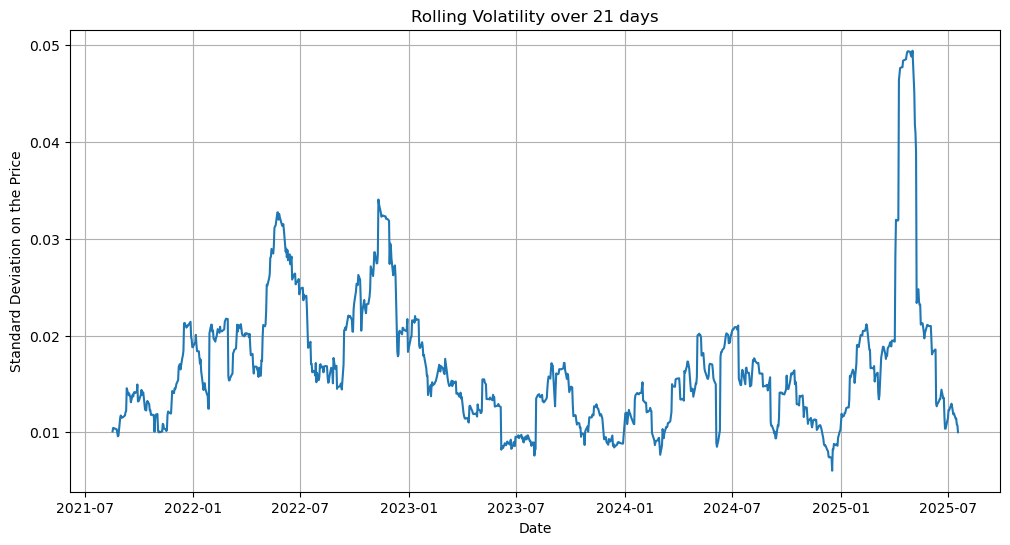

In [14]:
#calculating rolling standard deviation
volatility = (log_return_data.rolling(window=21).std())
#plotting the data
plt.figure(figsize=(12,6))
plt.ylabel("Standard Deviation on the Price")
plt.xlabel("Date")
plt.title("Rolling Volatility over 21 days")
plt.grid(True)
plt.plot(volatility)
plt.show()

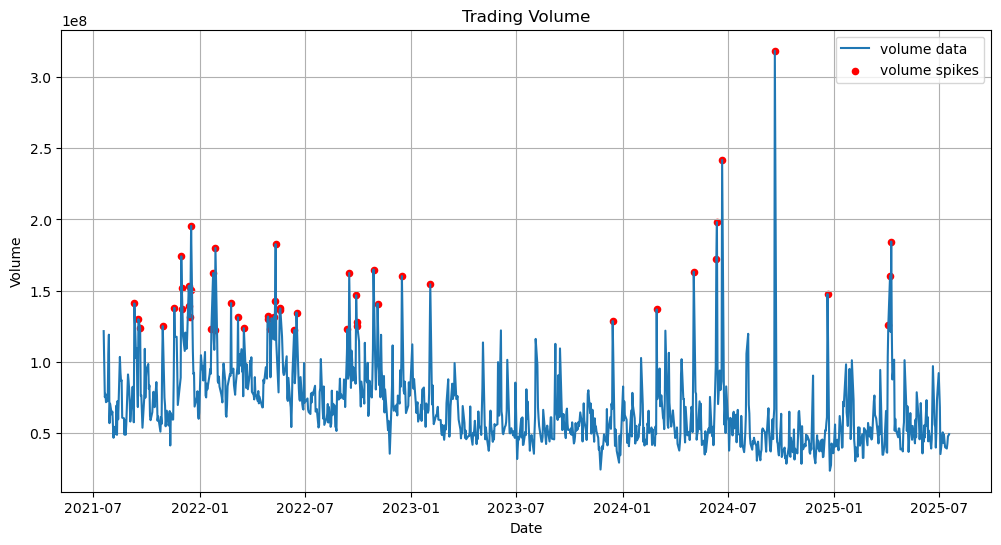

In [15]:
plt.figure(figsize=(12,6))
threshold = volume_data.quantile(0.95) #
spikes = volume_data[volume_data > threshold]
plt.plot(volume_data, label="volume data")
plt.scatter(spikes.index, spikes, s=20, color = 'r', label="volume spikes")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.title("Trading Volume")
plt.grid(True)
plt.legend()
plt.show()

## Baseline Training
To begin the training of our model, we require some input features for the model. The following features will be used :
- simple returns
- 1,2 and 3 day lags
- 5 and 20 day moving averages
- 5 day rolling volatility
- target pricing

In [16]:
import ta
data = yf.download(ticker_symbol, period="2y")

data['returns'] = data['Close'].pct_change()
data['lag5'] = data['returns'].shift(5)
data['lag10'] = data['returns'].shift(10)
data['lag15'] = data['returns'].shift(15)
data['lag20'] = data['returns'].shift(20)
data['lag25'] = data['returns'].shift(25)
data['ma5'] = data['Close'].rolling(window=5).mean()
data['ma10'] = data['Close'].rolling(window=10).mean()
data['ma20'] = data['Close'].rolling(window=20).mean()
data['ma30'] = data['Close'].rolling(window=30).mean()
data['v5'] = data['returns'].rolling(window=5).std()
data['v20'] = data['returns'].rolling(window=20).std()
data['target'] = data['returns'].shift(-1)

data['price'] = data['Close'].squeeze()

data['rsi'] = ta.momentum.RSIIndicator(data['price']).rsi()
data['macd'] = ta.trend.MACD(data['price']).macd()

data.dropna(inplace=True)

/tmp/ipykernel_123/1926064982.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker_symbol, period="2y")
[*********************100%***********************]  1 of 1 completed


## Basic ML using RandomForestRegressor

In [17]:
from sklearn.model_selection import train_test_split
features = ['lag5','lag10','lag15','lag20','lag25','ma5','ma10','ma20','ma30','v5','v20','rsi','macd']

X = data[features]
Y = data['target']
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, shuffle=False, test_size=0.2)

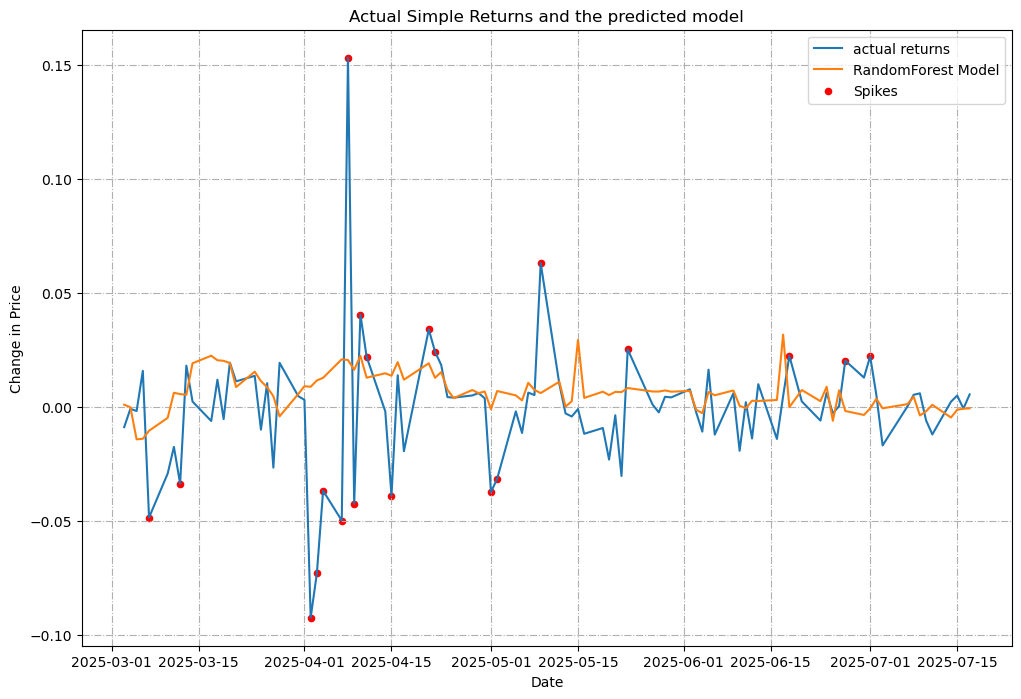

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


model = RandomForestRegressor()

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
Y_pred_series = pd.Series(Y_pred, index = X_test.index, name="predicted return")


plt.figure(figsize = (12,8))
plt.plot(Y_test,label="actual returns")

plt.plot(Y_pred_series, label="RandomForest Model")
Y_test = pd.DataFrame(Y_test)
big = Y_test.quantile(0.9)
small = Y_test.quantile(0.1)

positive_spikes = Y_test[Y_test > big]
negative_spikes = Y_test[Y_test < small]

plt.scatter(positive_spikes.index , positive_spikes, s = 20, color = 'red', label="Spikes")
plt.scatter(negative_spikes.index, negative_spikes, s = 20, color = 'red')
plt.xlabel("Date")
plt.ylabel("Change in Price")
plt.title("Actual Simple Returns and the predicted model")
plt.legend()
plt.grid(True, linestyle = '-.')
plt.show()

## Evaluating the Model

In [19]:
print("The mean squared error is {0:.4e} and the R2 score is {1:.4e}".format(mean_squared_error(Y_test, Y_pred),r2_score(Y_test, Y_pred)))

The mean squared error is 7.9432e-04 and the R2 score is -8.1817e-02


## Feature Importances from the RF algorithm

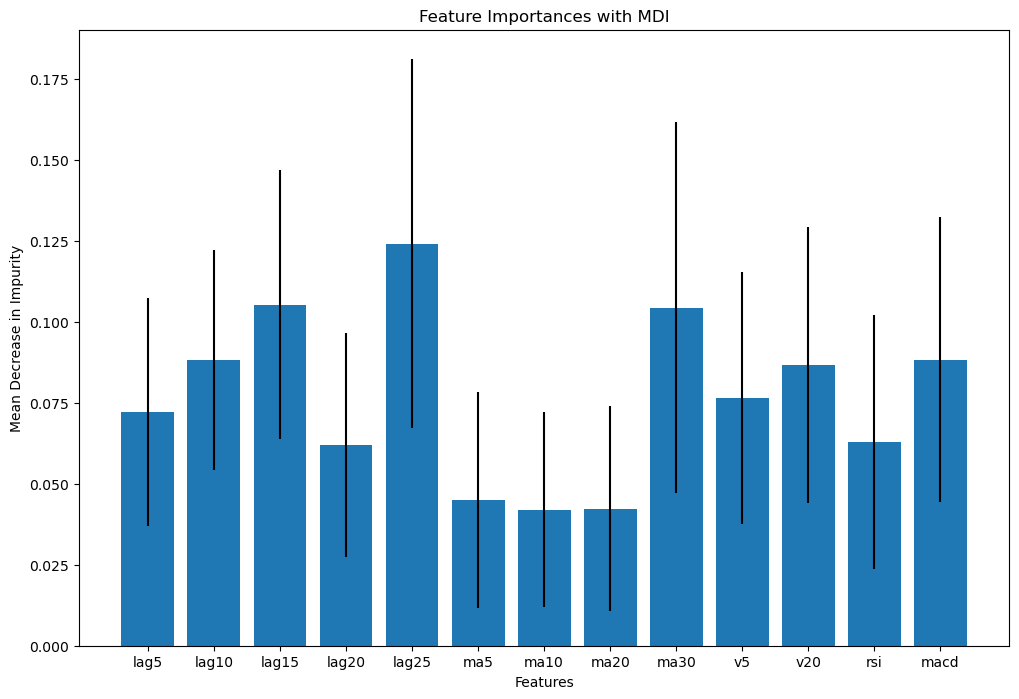

In [20]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
forest_importances = pd.Series(importances, index=features)

plt.figure(figsize=(12,8))
plt.xlabel("Features")
plt.ylabel("Mean Decrease in Impurity")
plt.title("Feature Importances with MDI")
plt.bar(features, forest_importances, yerr=std)
plt.show()

## Enhancing the Model
To further improve this model we will focus on improving the features by including more technical indicators and restructuring the model to use multiple ML and deep learning algorithms with different weightings depending on how the stock market data behaves. Depending on the characteristics, we can use a meta-learner to find the correct weighting of models to accurately predict what the stock price change will be.

In [21]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.svm import LinearSVR

This model will try to replicate the stock closing price and predict the stock price in the near future. For this model, the following features will be used:

In [22]:
data = yf.download(ticker_symbol, period="4y")
data['price'] = data['Close'].squeeze()
data['vol'] = data['Volume'].squeeze()

data['rsi'] = ta.momentum.RSIIndicator(data['price']).rsi()
data['macd'] = ta.trend.MACD(data['price']).macd()
data['ma50'] = data['Close'].rolling(window=50).mean()
data['ma200'] = data['Close'].rolling(window=200).mean()
data['roc'] = ta.momentum.ROCIndicator(data['price']).roc()
data['v5'] = data['Close'].rolling(window=5).std()
data['v10'] = data['Close'].rolling(window=10).std()
data['v20'] = data['Close'].rolling(window=20).std()
data['obv'] = ta.volume.OnBalanceVolumeIndicator(data['price'],data['vol']).on_balance_volume()
data['rvol'] = data['Volume'] / data['Volume'].rolling(window=20).mean()
data['bb_upper'] = ta.volatility.bollinger_hband(data['price'])
data['bb_lower'] = ta.volatility.bollinger_lband(data['price'])
data['bb_mean'] = ta.volatility.bollinger_mavg(data['price'])

for i in range(1,6):
    data[f'lag_{i}'] = data['price'].shift(i)
    data[f'rsi_lag_{i}'] = data['rsi'].shift(i)

data['target'] = data['Close'].pct_change().shift(-1)
data.dropna(inplace=True)

features = ['rsi_lag_1','rsi_lag_2','rsi_lag_3','rsi_lag_4','rsi_lag_5','lag_1','lag_2','lag_3','lag_4','lag_5','macd','ma50','ma200','roc','v5','v10','v20','obv','rvol','bb_upper','bb_lower','bb_mean']
X = data[features]
Y = data['Close']

/tmp/ipykernel_123/2777887136.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker_symbol, period="4y")
[*********************100%***********************]  1 of 1 completed


### LSTM Model

2025-07-20 11:32:27.020928: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/opt/conda/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7fa8d01e0540> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


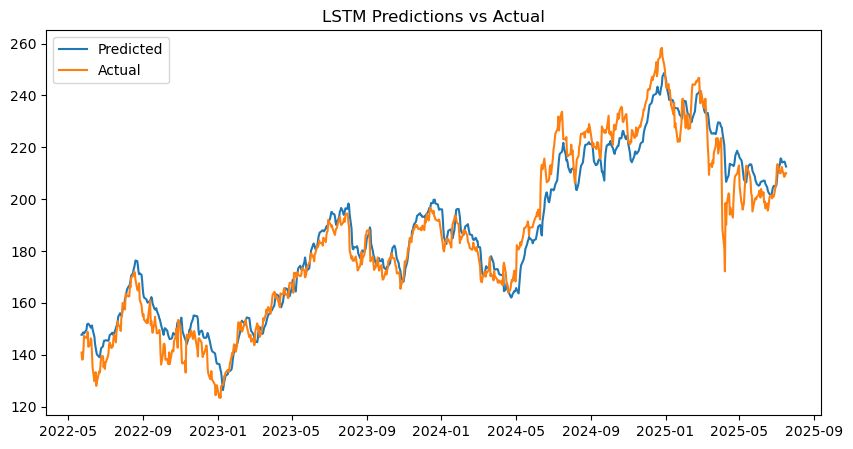

In [23]:
#LSTM Model
from keras.models import Sequential, Model
from keras.layers import LSTM, Dense, Dropout, Concatenate, Input, Flatten, BatchNormalization, MultiHeadAttention, GlobalAveragePooling1D, LayerNormalization, Embedding, Add, Embedding, Layer, GRU
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import keras.backend as K

split_num = 5
time_steps = 15
valid_timestamps = data.index[time_steps:]

def create_window_sequences(X,Y,timestep):
        X_set, Y_set = [], []
        
        for i in range(len(X) - timestep):
            X_set.append(X[i:i+timestep])
            Y_set.append(Y[i+timestep])
            
        return np.array(X_set), np.array(Y_set)
    
def LSTM_model(X,Y, are_we_training,graph_query):
    X_scaler = MinMaxScaler()
    Y_scaler = MinMaxScaler()
    
    def build_LSTM(input_shape):
        model = Sequential([
            
            Input(shape=(X_seq.shape[1],X_seq.shape[2])),
            LSTM(64, return_sequences = False, input_shape = input_shape),
            Dropout(0.2),
            Dense(32, activation='relu'),
            Dense(1)
        ])
        model.compile(optimizer='adam', loss='mse', metrics=['mae'])
        return model
    
    
    X_scaled = X_scaler.fit_transform(X)
    Y_scaled = Y_scaler.fit_transform(Y)
    
    X_seq, Y_seq = create_window_sequences(X_scaled, Y_scaled, timestep=time_steps)

    if are_we_training == True:
        preds = np.zeros_like(Y_seq)
        kf = KFold(n_splits=split_num, shuffle=False)
        
        for fold, (train_idx, val_idx) in enumerate(kf.split(X_seq)):
            X_train, X_val = X_seq[train_idx], X_seq[val_idx]
            Y_train = Y_seq[train_idx]
            lstm_model = build_LSTM(input_shape = (X_seq.shape[1], X_seq.shape[2]))
            lstm_model.fit(X_train, Y_train, epochs = 30, batch_size = 16, verbose=0)
            fold_preds_scaled = lstm_model.predict(X_val).reshape(-1,1)    
            preds[val_idx] = fold_preds_scaled
        
        unscaled_preds = Y_scaler.inverse_transform(preds)
        actual = Y[-len(unscaled_preds):]
        
        lstm_train_df = pd.DataFrame({
        'LSTM_Preds' : np.squeeze(unscaled_preds),
        'Actual' : np.squeeze(actual)
        })
        if graph_query == True:
            plt.figure(figsize=(10,5))
            plt.plot(lstm_train_df['LSTM_Preds'], label="Predicted")
            plt.plot(lstm_train_df['Actual'], label="Actual")
            plt.legend()
            plt.title("LSTM Predictions vs Actual")
            plt.show()

        return lstm_train_df['LSTM_Preds']
        
    else:
        split_index = int(len(X_seq)*0.8)
        X_train, X_test = X_seq[:split_index], X_seq[split_index:]
        Y_train, Y_test = Y_seq[:split_index], Y_seq[split_index:]
        lstm_model = build_LSTM(input_shape = (X_train.shape[1], X_train.shape[2]))
        lstm_model.fit(X_train, Y_train, epochs = 30, batch_size = 16, verbose=0)
        lstm_pred_scaled = lstm_model.predict(X_test)
        lstm_pred = Y_scaler.inverse_transform(lstm_pred_scaled)
        actual = Y[-len(lstm_pred):]
        lstm_test_df = pd.DataFrame({
            'LSTM_Preds' : np.squeeze(lstm_pred),
            'Actual' : np.squeeze(actual)
        })
        if graph_query == True:
            plt.figure(figsize=(10,5))
            plt.plot(lstm_test_df['LSTM_Preds'], label="Predicted")
            plt.plot(lstm_test_df['Actual'], label="Actual")
            plt.legend()
            plt.title("LSTM Predictions vs Actual")
            plt.show()
            
        return lstm_test_df['LSTM_Preds']
        
test = LSTM_model(X,Y,True,True)

### Random Forest Model

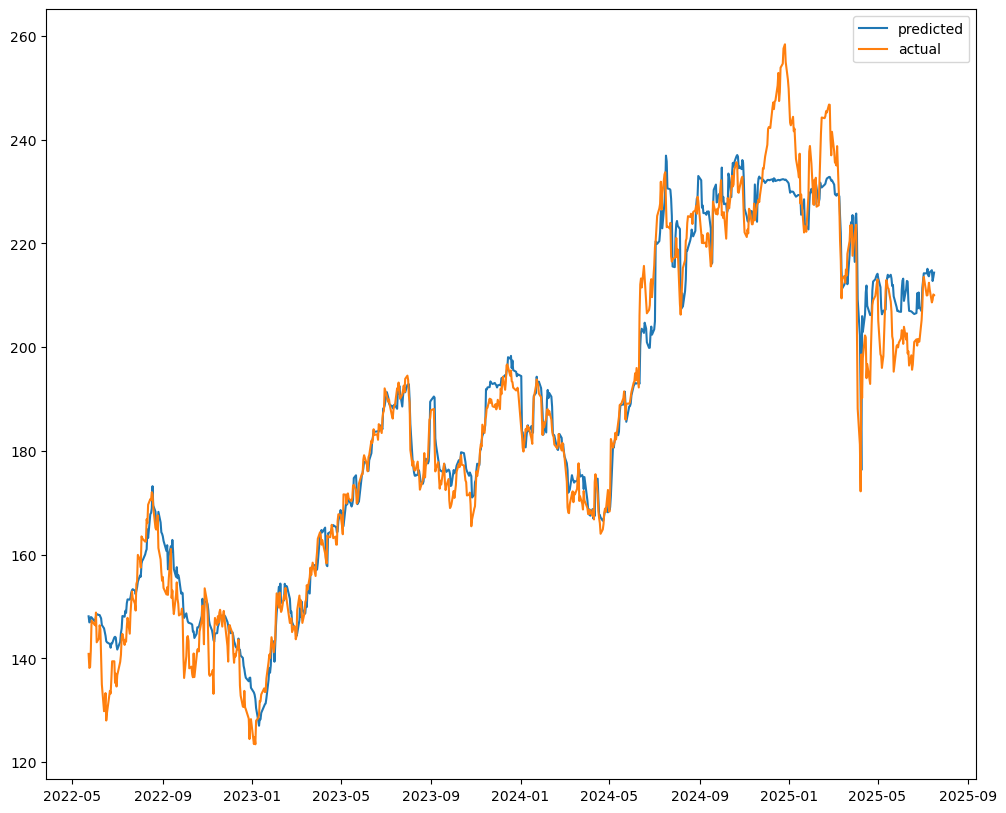

In [24]:
#ML Models

X_trimmed = X[time_steps:]
Y_trimmed = Y[time_steps:]

X_ML_scaler = StandardScaler()
Y_ML_scaler = StandardScaler()


def RandomForest(X,Y,are_we_training,graph_query):
    X_input = X_ML_scaler.fit_transform(X_trimmed)
    Y_input = Y_ML_scaler.fit_transform(Y_trimmed)

    if are_we_training == True:
        preds = np.zeros_like(Y_input)
        kf = KFold(n_splits=split_num, shuffle=False)
    
        for fold, (train_idx, val_idx) in enumerate(kf.split(X_input)):
    
            X_train, X_val = X_input[train_idx], X_input[val_idx]
            Y_train = Y_input[train_idx]
        
            RF_model = RandomForestRegressor()
            RF_model.fit(X_train,Y_train.ravel())
            
            fold_preds_scaled = RF_model.predict(X_val).reshape(-1,1)
            preds[val_idx] = fold_preds_scaled
    
        unscaled_preds = Y_ML_scaler.inverse_transform(preds)
        actual = Y_trimmed
        
        RF_train_df = pd.DataFrame({
            'RF_Preds' : np.squeeze(unscaled_preds),
            'Actual' : np.squeeze(actual)
        })
        if graph_query == True:
            plt.figure(figsize = (12,10))
            plt.plot(RF_train_df['RF_Preds'],label="predicted")
            plt.plot(RF_train_df['Actual'],label="actual")
            plt.legend()
            plt.show()

        return RF_train_df['RF_Preds']
        
    else:
        split_index = int(len(X_input)*0.8)
        X_train, X_test = X_input[:split_index], X_input[split_index:]
        Y_train, Y_test = Y_input[:split_index], Y_input[split_index:]
        RF_model = RandomForestRegressor()
        RF_model.fit(X_train,Y_train)
        unscaled_preds = RF_model.predict(X_test).reshape(-1,1)
        preds = Y_ML_scaler.inverse_transform(unscaled_preds)
        actual = Y_trimmed
        RF_test_df = pd.DataFrame({
            'RF_Preds' : np.squeeze(preds),
            'Actual' : np.squeeze(Y[-len(preds):])
        })

        if graph_query == True:
            plt.figure(figsize = (12,10))
            plt.plot(RF_test_df['RF_Preds'],label="predicted")
            plt.plot(RF_test_df['Actual'],label="actual")
            plt.legend()
            plt.show()

        return RF_test_df['RF_Preds']
test = RandomForest(X_trimmed,Y_trimmed,True,True)

### Linear Regression Model

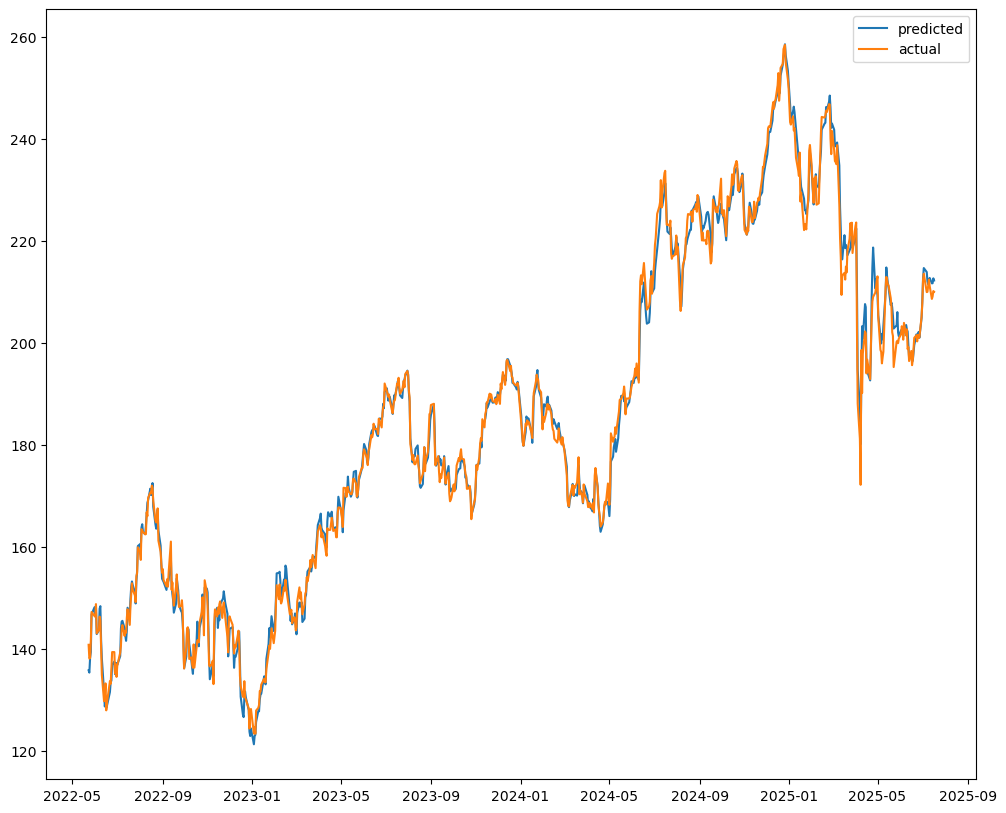

In [25]:
def LinearReg(X,Y,are_we_training,graph_query):
    X_input = X_ML_scaler.fit_transform(X_trimmed)
    Y_input = Y_ML_scaler.fit_transform(Y_trimmed)

    if are_we_training == True:
        preds = np.zeros_like(Y_input)
        kf = KFold(n_splits=split_num, shuffle=False)
    
        for fold, (train_idx, val_idx) in enumerate(kf.split(X_input)):
    
            X_train, X_val = X_input[train_idx], X_input[val_idx]
            Y_train = Y_input[train_idx]
        
            Lin_model = LinearRegression()
            Lin_model.fit(X_train,Y_train.ravel())
            
            fold_preds_scaled = Lin_model.predict(X_val).reshape(-1,1)
            preds[val_idx] = fold_preds_scaled
    
        unscaled_preds = Y_ML_scaler.inverse_transform(preds)
        actual = Y_trimmed
        
        Lin_train_df = pd.DataFrame({
            'Lin_Preds' : np.squeeze(unscaled_preds),
            'Actual' : np.squeeze(actual)
        })
        if graph_query == True:
            plt.figure(figsize = (12,10))
            plt.plot(Lin_train_df['Lin_Preds'],label="predicted")
            plt.plot(Lin_train_df['Actual'],label="actual")
            plt.legend()
            plt.show()

        return Lin_train_df['Lin_Preds']
        
    else:
        split_index = int(len(X_input)*0.8)
        X_train, X_test = X_input[:split_index], X_input[split_index:]
        Y_train, Y_test = Y_input[:split_index], Y_input[split_index:]
        Lin_model = LinearRegression()
        Lin_model.fit(X_train,Y_train)
        unscaled_preds = Lin_model.predict(X_test).reshape(-1,1)
        preds = Y_ML_scaler.inverse_transform(unscaled_preds)
        actual = Y_trimmed
        Lin_test_df = pd.DataFrame({
            'Lin_Preds' : np.squeeze(preds),
            'Actual' : np.squeeze(Y[-len(preds):])
        })

        if graph_query == True:
            plt.figure(figsize = (12,10))
            plt.plot(Lin_test_df['Lin_Preds'],label="predicted")
            plt.plot(Lin_test_df['Actual'],label="actual")
            plt.legend()
            plt.show()
        
        return Lin_test_df['Lin_Preds']
test = LinearReg(X_trimmed, Y_trimmed,True,True)

### SVM Regressor

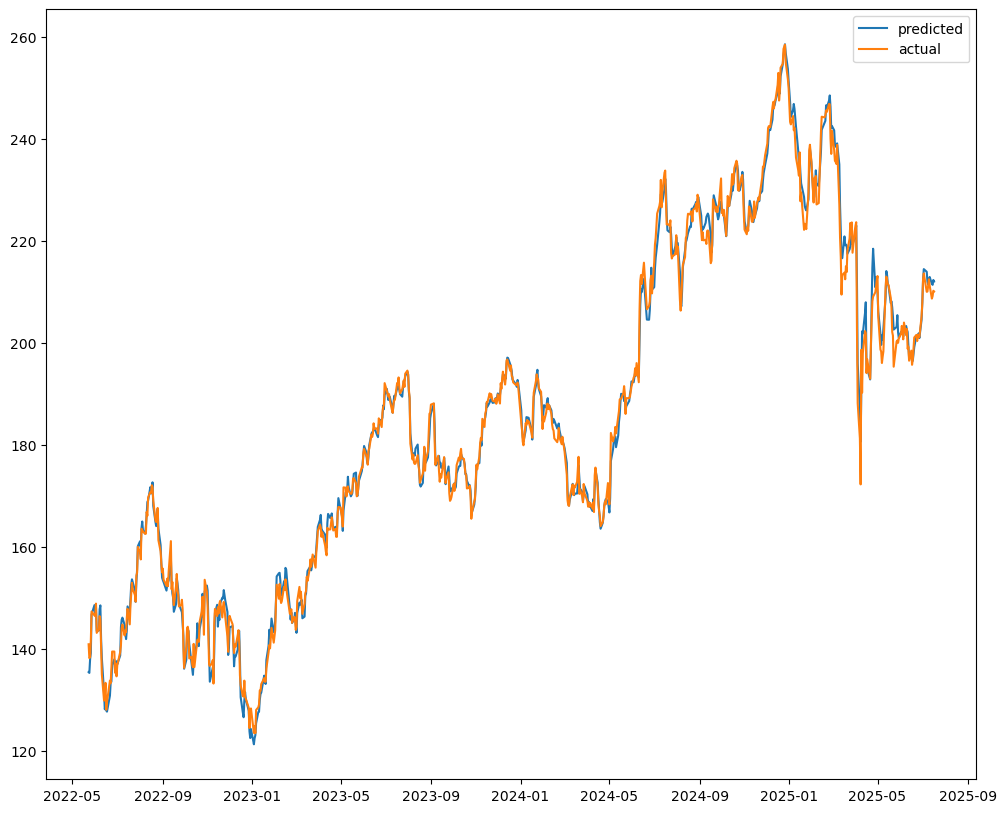

In [26]:
def SVRegressor(X,Y,are_we_training,graph_query):
    X_input = X_ML_scaler.fit_transform(X_trimmed)
    Y_input = Y_ML_scaler.fit_transform(Y_trimmed)

    if are_we_training == True:
        preds = np.zeros_like(Y_input)
        kf = KFold(n_splits=split_num, shuffle=False)
    
        for fold, (train_idx, val_idx) in enumerate(kf.split(X_input)):
    
            X_train, X_val = X_input[train_idx], X_input[val_idx]
            Y_train = Y_input[train_idx]
        
            SVR_model = LinearSVR(max_iter=50000)
            SVR_model.fit(X_train,Y_train.ravel())
            
            fold_preds_scaled = SVR_model.predict(X_val).reshape(-1,1)
            preds[val_idx] = fold_preds_scaled
    
        unscaled_preds = Y_ML_scaler.inverse_transform(preds)
        actual = Y_trimmed
        
        SVR_train_df = pd.DataFrame({
            'SVR_Preds' : np.squeeze(unscaled_preds),
            'Actual' : np.squeeze(actual)
        })
        if graph_query == True:
            plt.figure(figsize = (12,10))
            plt.plot(SVR_train_df['SVR_Preds'],label="predicted")
            plt.plot(SVR_train_df['Actual'],label="actual")
            plt.legend()
            plt.show()

        return SVR_train_df['SVR_Preds']
        
    else:
        split_index = int(len(X_input)*0.8)
        X_train, X_test = X_input[:split_index], X_input[split_index:]
        Y_train, Y_test = Y_input[:split_index], Y_input[split_index:]
        SVR_model = LinearSVR(max_iter=50000)
        SVR_model.fit(X_train,Y_train)
        unscaled_preds = SVR_model.predict(X_test).reshape(-1,1)
        preds = Y_ML_scaler.inverse_transform(unscaled_preds)
        actual = Y_trimmed
        SVR_test_df = pd.DataFrame({
            'SVR_Preds' : np.squeeze(preds),
            'Actual' : np.squeeze(Y[-len(preds):])
        })

        if graph_query == True:
            plt.figure(figsize = (12,10))
            plt.plot(SVR_test_df['SVR_Preds'],label="predicted")
            plt.plot(SVR_test_df['Actual'],label="actual")
            plt.legend()
            plt.show()
        
        return SVR_test_df['SVR_Preds']
test = SVRegressor(X_trimmed, Y_trimmed,True,True)

### XGBooster Regression Model

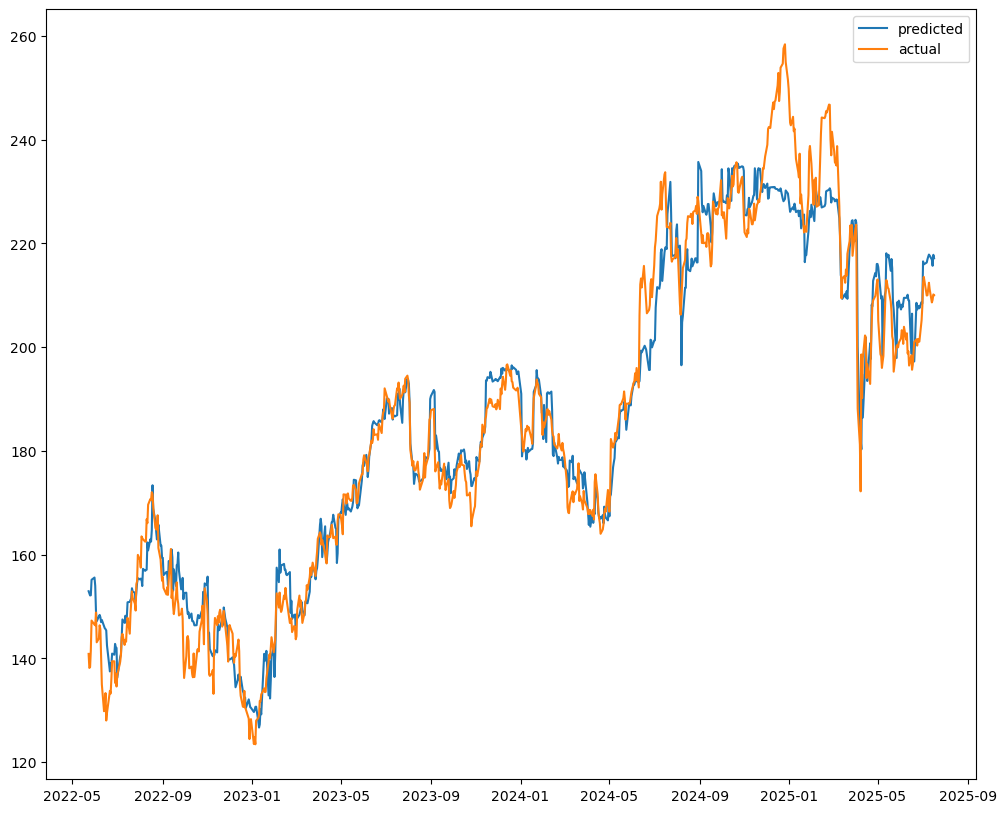

In [27]:
def XGBooster(X,Y,are_we_training,graph_query):
    X_input = X_ML_scaler.fit_transform(X_trimmed)
    Y_input = Y_ML_scaler.fit_transform(Y_trimmed)

    if are_we_training == True:
        preds = np.zeros_like(Y_input)
        kf = KFold(n_splits=split_num, shuffle=False)
    
        for fold, (train_idx, val_idx) in enumerate(kf.split(X_input)):
    
            X_train, X_val = X_input[train_idx], X_input[val_idx]
            Y_train = Y_input[train_idx]
        
            XGB_model = XGBRegressor()
            XGB_model.fit(X_train,Y_train.ravel())
            
            fold_preds_scaled = XGB_model.predict(X_val).reshape(-1,1)
            preds[val_idx] = fold_preds_scaled
    
        unscaled_preds = Y_ML_scaler.inverse_transform(preds)
        actual = Y_trimmed
        
        XGB_train_df = pd.DataFrame({
            'XGB_Preds' : np.squeeze(unscaled_preds),
            'Actual' : np.squeeze(actual)
        })
        if graph_query == True:
            plt.figure(figsize = (12,10))
            plt.plot(XGB_train_df['XGB_Preds'],label="predicted")
            plt.plot(XGB_train_df['Actual'],label="actual")
            plt.legend()
            plt.show()

        return XGB_train_df['XGB_Preds']
        
    else:
        split_index = int(len(X_input)*0.8)
        X_train, X_test = X_input[:split_index], X_input[split_index:]
        Y_train, Y_test = Y_input[:split_index], Y_input[split_index:]
        XGB_model = XGBRegressor()
        XGB_model.fit(X_train,Y_train)
        unscaled_preds = XGB_model.predict(X_test).reshape(-1,1)
        preds = Y_ML_scaler.inverse_transform(unscaled_preds)
        actual = Y_trimmed
        XGB_test_df = pd.DataFrame({
            'XGB_Preds' : np.squeeze(preds),
            'Actual' : np.squeeze(Y[-len(preds):])
        })

        if graph_query == True:
            plt.figure(figsize = (12,10))
            plt.plot(XGB_test_df['XGB_Preds'],label="predicted")
            plt.plot(XGB_test_df['Actual'],label="actual")
            plt.legend()
            plt.show()

        return XGB_test_df['XGB_Preds']


test = XGBooster(X_trimmed, Y_trimmed, True, True)

### KNeighbors Model

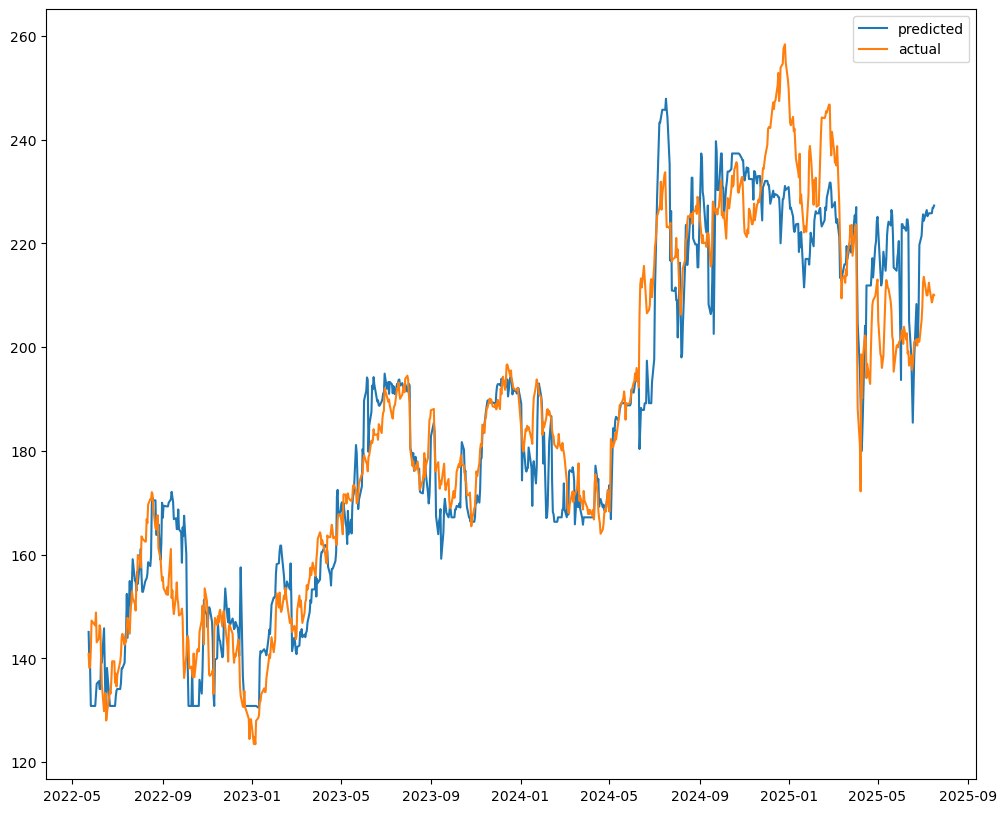

In [28]:
def KNeighbors(X,Y,are_we_training,graph_query):
    X_input = X_ML_scaler.fit_transform(X_trimmed)
    Y_input = Y_ML_scaler.fit_transform(Y_trimmed)

    if are_we_training == True:
        preds = np.zeros_like(Y_input)
        kf = KFold(n_splits=split_num, shuffle=False)
    
        for fold, (train_idx, val_idx) in enumerate(kf.split(X_input)):
    
            X_train, X_val = X_input[train_idx], X_input[val_idx]
            Y_train = Y_input[train_idx]
        
            KN_model = KNeighborsRegressor()
            KN_model.fit(X_train,Y_train.ravel())
            
            fold_preds_scaled = KN_model.predict(X_val).reshape(-1,1)
            preds[val_idx] = fold_preds_scaled
    
        unscaled_preds = Y_ML_scaler.inverse_transform(preds)
        actual = Y_trimmed
        
        KN_train_df = pd.DataFrame({
            'KN_Preds' : np.squeeze(unscaled_preds),
            'Actual' : np.squeeze(actual)
        })
        if graph_query == True:
            plt.figure(figsize = (12,10))
            plt.plot(KN_train_df['KN_Preds'],label="predicted")
            plt.plot(KN_train_df['Actual'],label="actual")
            plt.legend()
            plt.show()

        return KN_train_df['KN_Preds']
        
    else:
        split_index = int(len(X_input)*0.8)
        X_train, X_test = X_input[:split_index], X_input[split_index:]
        Y_train, Y_test = Y_input[:split_index], Y_input[split_index:]
        KN_model = KNeighborsRegressor()
        KN_model.fit(X_train,Y_train)
        unscaled_preds = KN_model.predict(X_test).reshape(-1,1)
        preds = Y_ML_scaler.inverse_transform(unscaled_preds)
        actual = Y_trimmed
        KN_test_df = pd.DataFrame({
            'KN_Preds' : np.squeeze(preds),
            'Actual' : np.squeeze(Y[-len(preds):])
        })

        if graph_query == True:
            plt.figure(figsize = (12,10))
            plt.plot(KN_test_df['KN_Preds'],label="predicted")
            plt.plot(KN_test_df['Actual'],label="actual")
            plt.legend()
            plt.show()

        return KN_test_df['KN_Preds']


test = KNeighbors(X_trimmed, Y_trimmed, True, True)

### MLP Regression Model

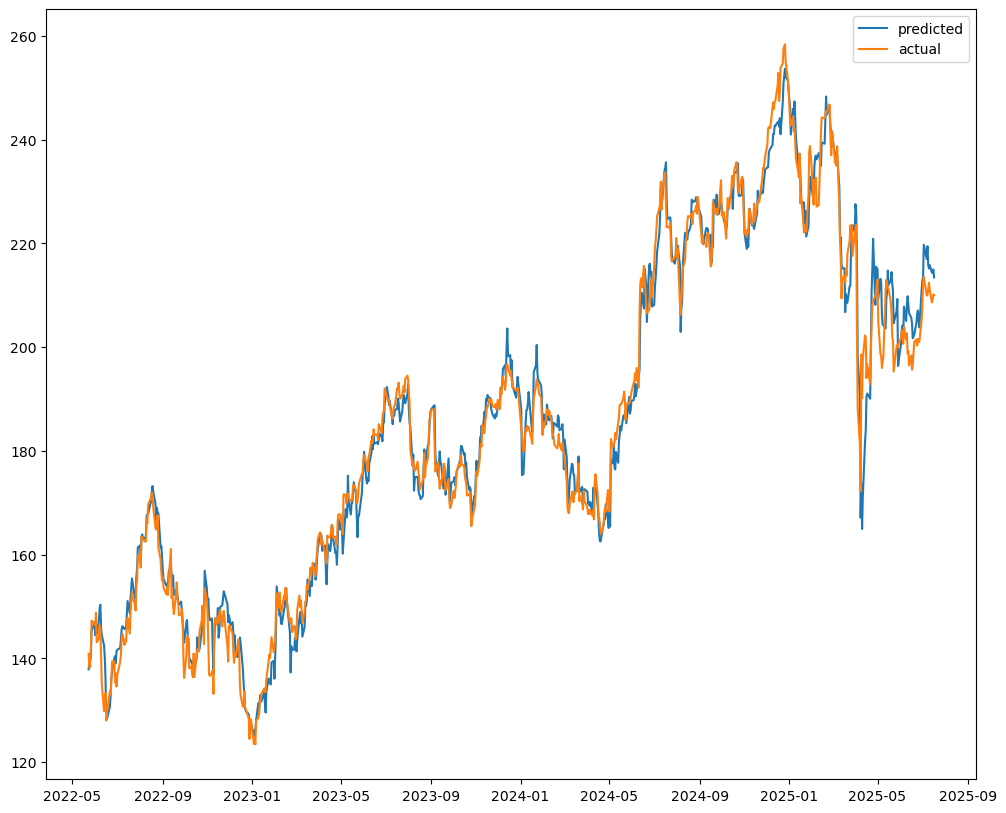

In [29]:
def MLPReg(X,Y,are_we_training,graph_query):
    X_input = X_ML_scaler.fit_transform(X_trimmed)
    Y_input = Y_ML_scaler.fit_transform(Y_trimmed)

    if are_we_training == True:
        preds = np.zeros_like(Y_input)
        kf = KFold(n_splits=split_num, shuffle=False)
    
        for fold, (train_idx, val_idx) in enumerate(kf.split(X_input)):
    
            X_train, X_val = X_input[train_idx], X_input[val_idx]
            Y_train = Y_input[train_idx]
        
            MLP_model = MLPRegressor(
                hidden_layer_sizes = (100,50),
                activation = 'relu',
                solver = 'adam',
                learning_rate = 'adaptive',
                max_iter = 1000,
                early_stopping = True,
                random_state = 42
            )
            MLP_model.fit(X_train,Y_train.ravel())
            
            fold_preds_scaled = MLP_model.predict(X_val).reshape(-1,1)
            preds[val_idx] = fold_preds_scaled
    
        unscaled_preds = Y_ML_scaler.inverse_transform(preds)
        actual = Y_trimmed
        
        MLP_train_df = pd.DataFrame({
            'MLP_Preds' : np.squeeze(unscaled_preds),
            'Actual' : np.squeeze(actual)
        })
        if graph_query == True:
            plt.figure(figsize = (12,10))
            plt.plot(MLP_train_df['MLP_Preds'],label="predicted")
            plt.plot(MLP_train_df['Actual'],label="actual")
            plt.legend()
            plt.show()

        return MLP_train_df['MLP_Preds']
        
    else:
        split_index = int(len(X_input)*0.8)
        X_train, X_test = X_input[:split_index], X_input[split_index:]
        Y_train, Y_test = Y_input[:split_index], Y_input[split_index:]
        MLP_model = MLPRegressor(
                hidden_layer_sizes = (100,50),
                activation = 'relu',
                solver = 'adam',
                learning_rate = 'adaptive',
                max_iter = 1000,
                early_stopping = True,
                random_state = 42
            )
        MLP_model.fit(X_train,Y_train)
        unscaled_preds = MLP_model.predict(X_test).reshape(-1,1)
        preds = Y_ML_scaler.inverse_transform(unscaled_preds)
        actual = Y_trimmed
        MLP_test_df = pd.DataFrame({
            'MLP_Preds' : np.squeeze(preds),
            'Actual' : np.squeeze(Y[-len(preds):])
        })

        if graph_query == True:        
            plt.figure(figsize = (12,10))
            plt.plot(MLP_test_df['MLP_Preds'],label="predicted")
            plt.plot(MLP_test_df['Actual'],label="actual")
            plt.legend()
            plt.show()

        return MLP_test_df['MLP_Preds']

test = MLPReg(X_trimmed, Y_trimmed, True, True)

### Meta Learner

/opt/conda/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


/opt/conda/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


/opt/conda/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/conda/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step


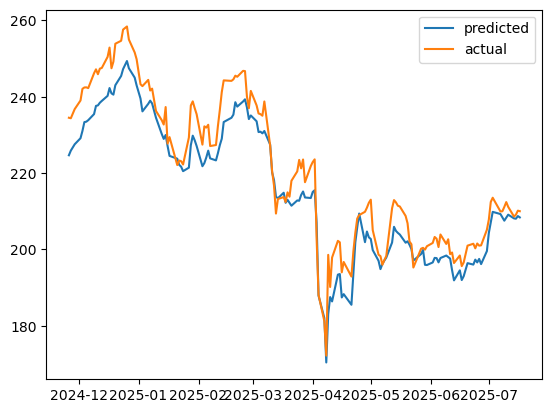

In [30]:
lstm_train_preds, rf_train_preds, lin_train_preds, xgb_train_preds, kn_train_preds, mlp_train_preds, svr_train_preds =  LSTM_model(X,Y,True,False), RandomForest(X_trimmed,Y_trimmed,True,False), LinearReg(X_trimmed,Y_trimmed,True,False), XGBooster(X_trimmed, Y_trimmed, True, False), KNeighbors(X_trimmed, Y_trimmed, True, False), MLPReg(X_trimmed, Y_trimmed, True, False), SVRegressor(X_trimmed,Y_trimmed,True,False)
lstm_test_preds, rf_test_preds, lin_test_preds, xgb_test_preds, kn_test_preds, mlp_test_preds, svr_test_preds =  LSTM_model(X,Y,False,False), RandomForest(X_trimmed,Y_trimmed,False,False), LinearReg(X_trimmed,Y_trimmed,False,False), XGBooster(X_trimmed, Y_trimmed, False, False), KNeighbors(X_trimmed, Y_trimmed, False, False), MLPReg(X_trimmed, Y_trimmed, False, False), SVRegressor(X_trimmed,Y_trimmed,False,False)

def shaper(X):
    if isinstance(X, pd.Series):
        return X.to_numpy().reshape(-1,1)
    elif isinstance(X, pd.DataFrame):
        return X.values.reshape(-1,1)
    elif isinstance(X, np.ndarray):
        return X.reshape(-1,1)

def min_len_slicing(*arrays):
    min_len = min(arr.shape[0] for arr in arrays)
    return [arr[:min_len] for arr in arrays]

X_meta_scaler = MinMaxScaler()
X_raw_scaler = MinMaxScaler()
Y_raw_scaler = MinMaxScaler()

X_meta_train = np.concatenate([shaper(lstm_train_preds), shaper(rf_train_preds), shaper(lin_train_preds), shaper(xgb_train_preds), shaper(kn_train_preds), shaper(mlp_train_preds), shaper(svr_train_preds)],axis=1)
X_meta_test = np.concatenate([shaper(lstm_test_preds), shaper(rf_test_preds), shaper(lin_test_preds), shaper(xgb_test_preds), shaper(kn_test_preds), shaper(mlp_test_preds), shaper(svr_test_preds)],axis=1)
X_scaled = X_raw_scaler.fit_transform(X)
Y_scaled = Y_raw_scaler.fit_transform(Y)
X_pred_input = X_meta_scaler.fit_transform(X_meta_train)
X_test_input = X_meta_scaler.transform(X_meta_test)

X_seq, Y_meta_input = create_window_sequences(X_scaled, Y_scaled, timestep=time_steps)
split_index = int(len(X_seq)*0.8)

X_seq_train = X_seq[:split_index]
X_seq_test = X_seq[split_index:]

X_pred_input = X_meta_scaler.fit_transform(X_meta_train)
X_test_input = X_meta_scaler.transform(X_meta_test)

pred_inputs = Input(shape=(X_pred_input.shape[1],))
raw_inputs = Input(shape=(X_seq_train.shape[1],X_seq_train.shape[2]))

def temporal_encoder(dataset):
    raw_inputs = Input(shape=(dataset.shape[1],dataset.shape[2]))
    raw_positions = tf.range(start=0, limit=dataset.shape[1], delta=1)
    raw_pos_encode = Embedding(input_dim=1000, output_dim=dataset.shape[2])(raw_positions)
    raw_pos_encode = tf.expand_dims(raw_pos_encode, axis=0)
    final_input = dataset + raw_pos_encode
    return final_input

raw_input_set1 = temporal_encoder(raw_inputs)

x_wide = Dense(32,activation='relu')(pred_inputs)
x_wide = Dropout(0.1)(x_wide)
x_deep = Dense(128,activation='relu')(pred_inputs)
x_deep = Dropout(0.1)(x_deep)
x_deep = Dense(64,activation='relu')(x_deep)
x_deep = Dropout(0.1)(x_deep)

x1 = Concatenate()([x_wide,x_deep])
x1 = Dense(32,activation='relu')(x1)
x1 = Dropout(0.1)(x1)

x2 = LSTM(128,return_sequences=True)(raw_input_set1)    
x2 = Dropout(0.1)(x2)
x2 = LSTM(64,return_sequences=True)(x2)
x2 = Dropout(0.1)(x2)
attn = MultiHeadAttention(num_heads=4, key_dim=8)(x2,x2)
attn = LSTM(32)(attn)

merged = Concatenate()([x1,attn])

x = Dense(128,activation='relu')(merged)
x = Dropout(0.1)(x)
x = BatchNormalization()(x)
x = Dense(64,activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(32,activation='relu')(x)
x = Dropout(0.1)(x)
output = Dense(1)(x)

meta_model = Model(inputs=[pred_inputs,raw_inputs],outputs=output)
meta_model.compile(optimizer='adam',loss='huber',metrics=['mae'])
meta_model.fit([X_pred_input,X_seq],Y_meta_input.ravel(), epochs=100, batch_size=10, verbose=0)
preds = meta_model.predict([X_test_input,X_seq_test]).reshape(-1,1)
preds = Y_raw_scaler.inverse_transform(preds)

meta_learner_df = pd.DataFrame({
    'Meta_Preds' : np.squeeze(preds),
    'Actual' : np.squeeze(Y[-len(preds):])
})

plt.plot(meta_learner_df['Meta_Preds'],label="predicted")
plt.plot(meta_learner_df['Actual'],label="actual")
plt.legend()
plt.show()

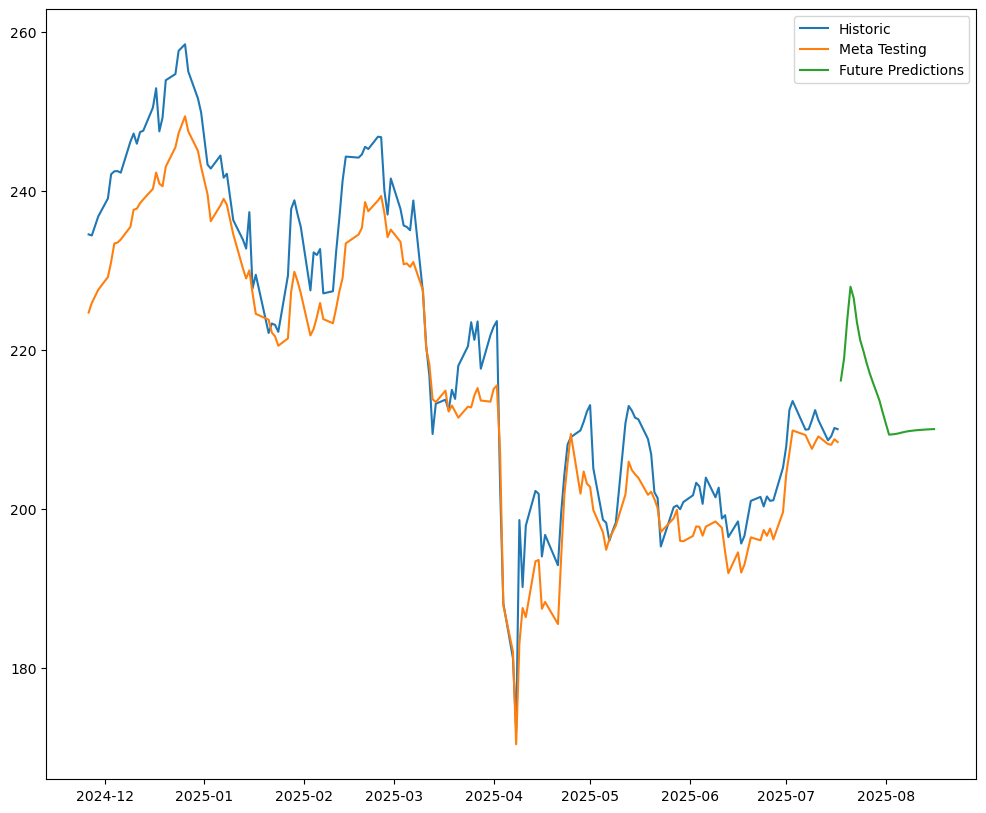

In [40]:
n_future = 30  # days to predict
predictions = []

last_raw_seq = X_seq[-1]  # shape: (time_steps, num_features)
last_input_meta = X_meta_test[-1]  # shape: (num_models,)

for i in range(n_future):
    # 1. Scale and reshape raw input sequence for model
    scaled_raw_seq = X_raw_scaler.transform(last_raw_seq)
    scaled_raw_seq = scaled_raw_seq.reshape(1, *scaled_raw_seq.shape)

    # 2. Scale meta input
    scaled_meta_input = X_meta_scaler.transform(last_input_meta.reshape(1, -1))

    # 3. Predict next value
    pred = meta_model.predict([scaled_meta_input, scaled_raw_seq], verbose=0)
    pred_inv = Y_raw_scaler.inverse_transform(pred.reshape(-1, 1))[0][0]
    predictions.append(pred_inv)

    # 4. Build new input row
    new_row = last_raw_seq[-1].copy().reshape(1, -1)  # duplicate last known input
    new_row[0, 0] = pred_inv  # replace target value in the first feature (adjust index as needed)

    # 5. Slide the window forward
    last_raw_seq = np.append(last_raw_seq[1:], new_row, axis=0)

    # 6. (Optional) update meta input using your base models if you want smarter forecasting
# If your data has a 'Date' column:
last_date = meta_learner_df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1),periods=n_future, freq='D')
#last_date = pd.to_datetime(meta_df['Date'].iloc[-1])

# OR if your DataFrame is indexed by datetime:
# last_date = df.index[-1]
prediction_df = pd.DataFrame({
    'Future Preds' : np.squeeze(predictions),
    'Date' : (future_dates)
})
prediction_df.set_index('Date',inplace=True)
plt.figure(figsize=(12,10))
plt.plot(meta_learner_df['Actual'],label='Historic')
plt.plot(meta_learner_df['Meta_Preds'],label='Meta Testing')
plt.plot(prediction_df['Future Preds'],label='Future Predictions')
plt.legend()
plt.show()